# Отток клиентов

**Описание данных**

Признаки

RowNumber — индекс строки в данных

CustomerId — уникальный идентификатор клиента

Surname — фамилия

CreditScore — кредитный рейтинг

Geography — страна проживания

Gender — пол

Age — возраст

Tenure — сколько лет человек является клиентом банка

Balance — баланс на счёте

NumOfProducts — количество продуктов банка, используемых клиентом

HasCrCard — наличие кредитной карты

IsActiveMember — активность клиента

EstimatedSalary — предполагаемая зарплата

Целевой признак

Exited — факт ухода клиента

## Подготовка данных

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [96]:
df = pd.read_csv('/datasets/Churn.csv')
print(df.head(5))
df.info()
print('явных дубликатов:', df.duplicated().sum())
print(df.describe())
print(df.shape)
df.duplicated().sum()
df.corr(method='spearman')

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     2.0       0.00              1          1               1   
1     1.0   83807.86              1          0               1   
2     8.0  159660.80              3          1               0   
3     1.0       0.00              2          0               0   
4     2.0  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004187,0.005130,0.000476,-0.007650,-0.009013,0.008305,0.000599,0.012044,-0.006007,-0.016571
CustomerId,0.004187,1.000000,0.005967,0.008775,-0.021410,-0.013932,0.019297,-0.014023,0.001682,0.015246,-0.006264
CreditScore,0.005130,0.005967,1.000000,-0.007974,0.000604,0.005687,0.012568,-0.003802,0.024262,0.001237,-0.023289
Age,0.000476,0.008775,-0.007974,1.000000,-0.014275,0.033304,-0.058566,-0.015278,0.039839,-0.002431,0.323968
Tenure,-0.007650,-0.021410,0.000604,-0.014275,1.000000,-0.005252,0.011453,0.027293,-0.032596,0.010343,-0.016762
Balance,-0.009013,-0.013932,0.005687,0.033304,-0.005252,1.000000,-0.316627,-0.009835,-0.011497,0.011778,0.111110
NumOfProducts,0.008305,0.019297,0.012568,-0.058566,0.011453,-0.316627,1.000000,0.003859,0.016292,0.012570,-0.125282
HasCrCard,0.000599,-0.014023,-0.003802,-0.015278,0.027293,-0.009835,0.003859,1.000000,-0.011866,-0.010041,-0.007138
IsActiveMember,0.012044,0.001682,0.024262,0.039839,-0.032596,-0.011497,0.016292,-0.011866,1.000000,-0.011469,-0.156128
EstimatedSalary,-0.006007,0.015246,0.001237,-0.002431,0.010343,0.011778,0.012570,-0.010041,-0.011469,1.000000,0.012081


<div class="alert alert-block alert-success"; style="border-left: 6px solid green">
<b>Успех ✔️</b>
       
Данные на базе и предварительно изучены, идем дальше!)
    
</div>


In [97]:
#print(df['Tenure'].unique())
df = df.dropna(subset=['Tenure']).reset_index(drop=True) #корреляция с целевым -0.016762, с остальными тоже незначительна, можно удалить
df['Tenure'] = df['Tenure'].astype('int')
df.drop(['CustomerId','Surname', 'RowNumber'], axis=1, inplace=True) #не важны для целей задания, номер строки тоже   
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9091 entries, 0 to 9090
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9091 non-null   int64  
 1   Geography        9091 non-null   object 
 2   Gender           9091 non-null   object 
 3   Age              9091 non-null   int64  
 4   Tenure           9091 non-null   int64  
 5   Balance          9091 non-null   float64
 6   NumOfProducts    9091 non-null   int64  
 7   HasCrCard        9091 non-null   int64  
 8   IsActiveMember   9091 non-null   int64  
 9   EstimatedSalary  9091 non-null   float64
 10  Exited           9091 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 781.4+ KB


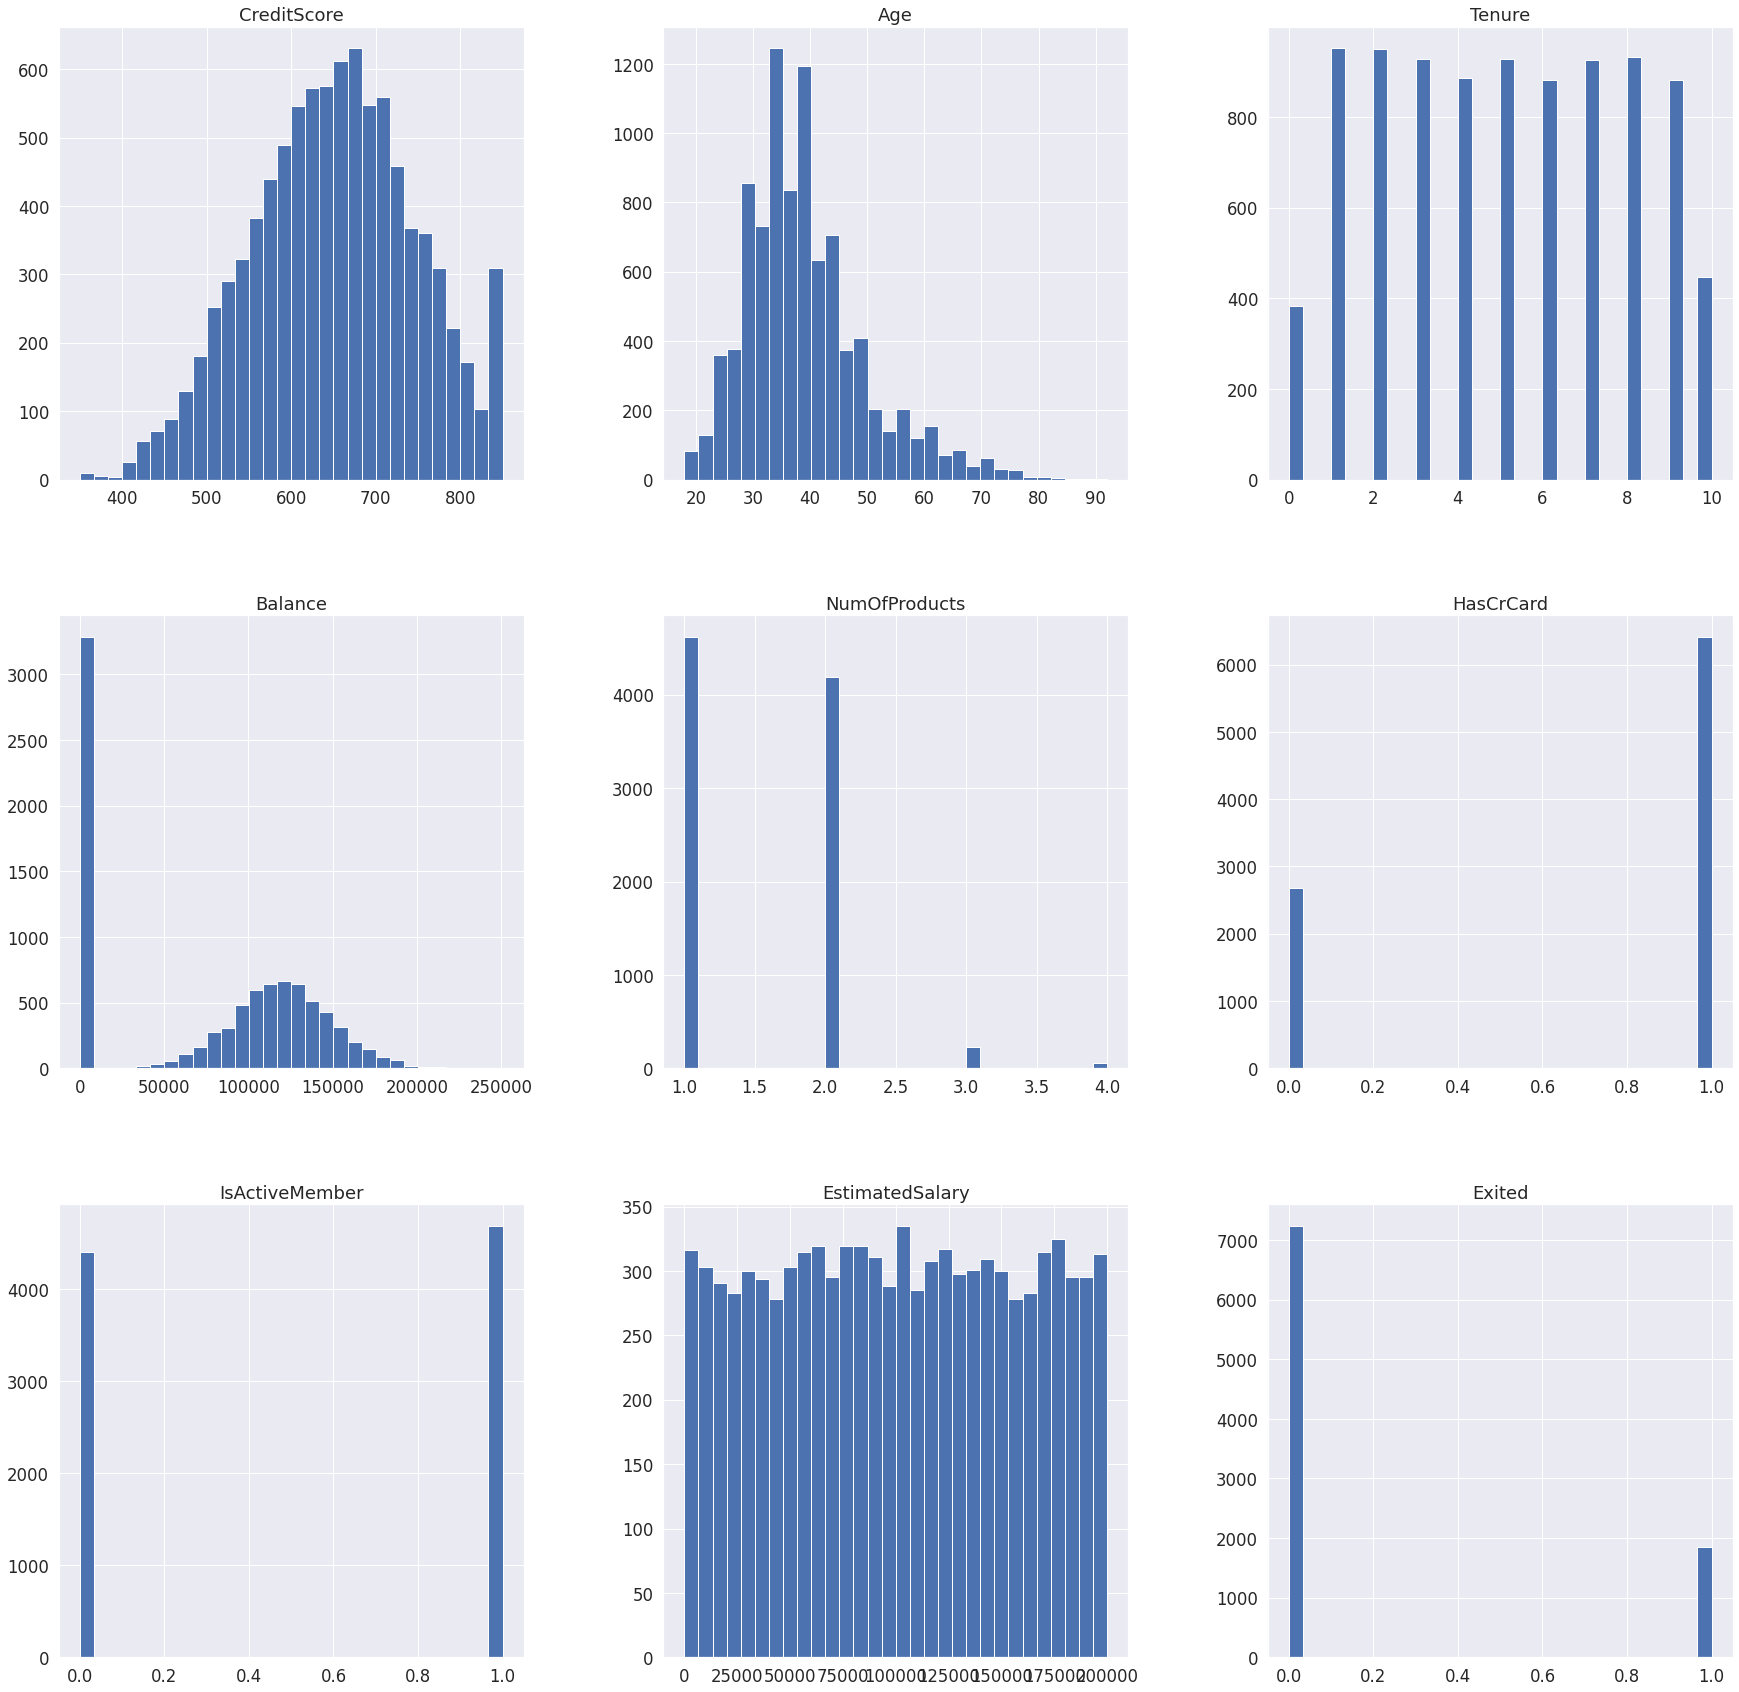

In [99]:
df.hist(figsize=(30,30), bins=30)
plt.show()

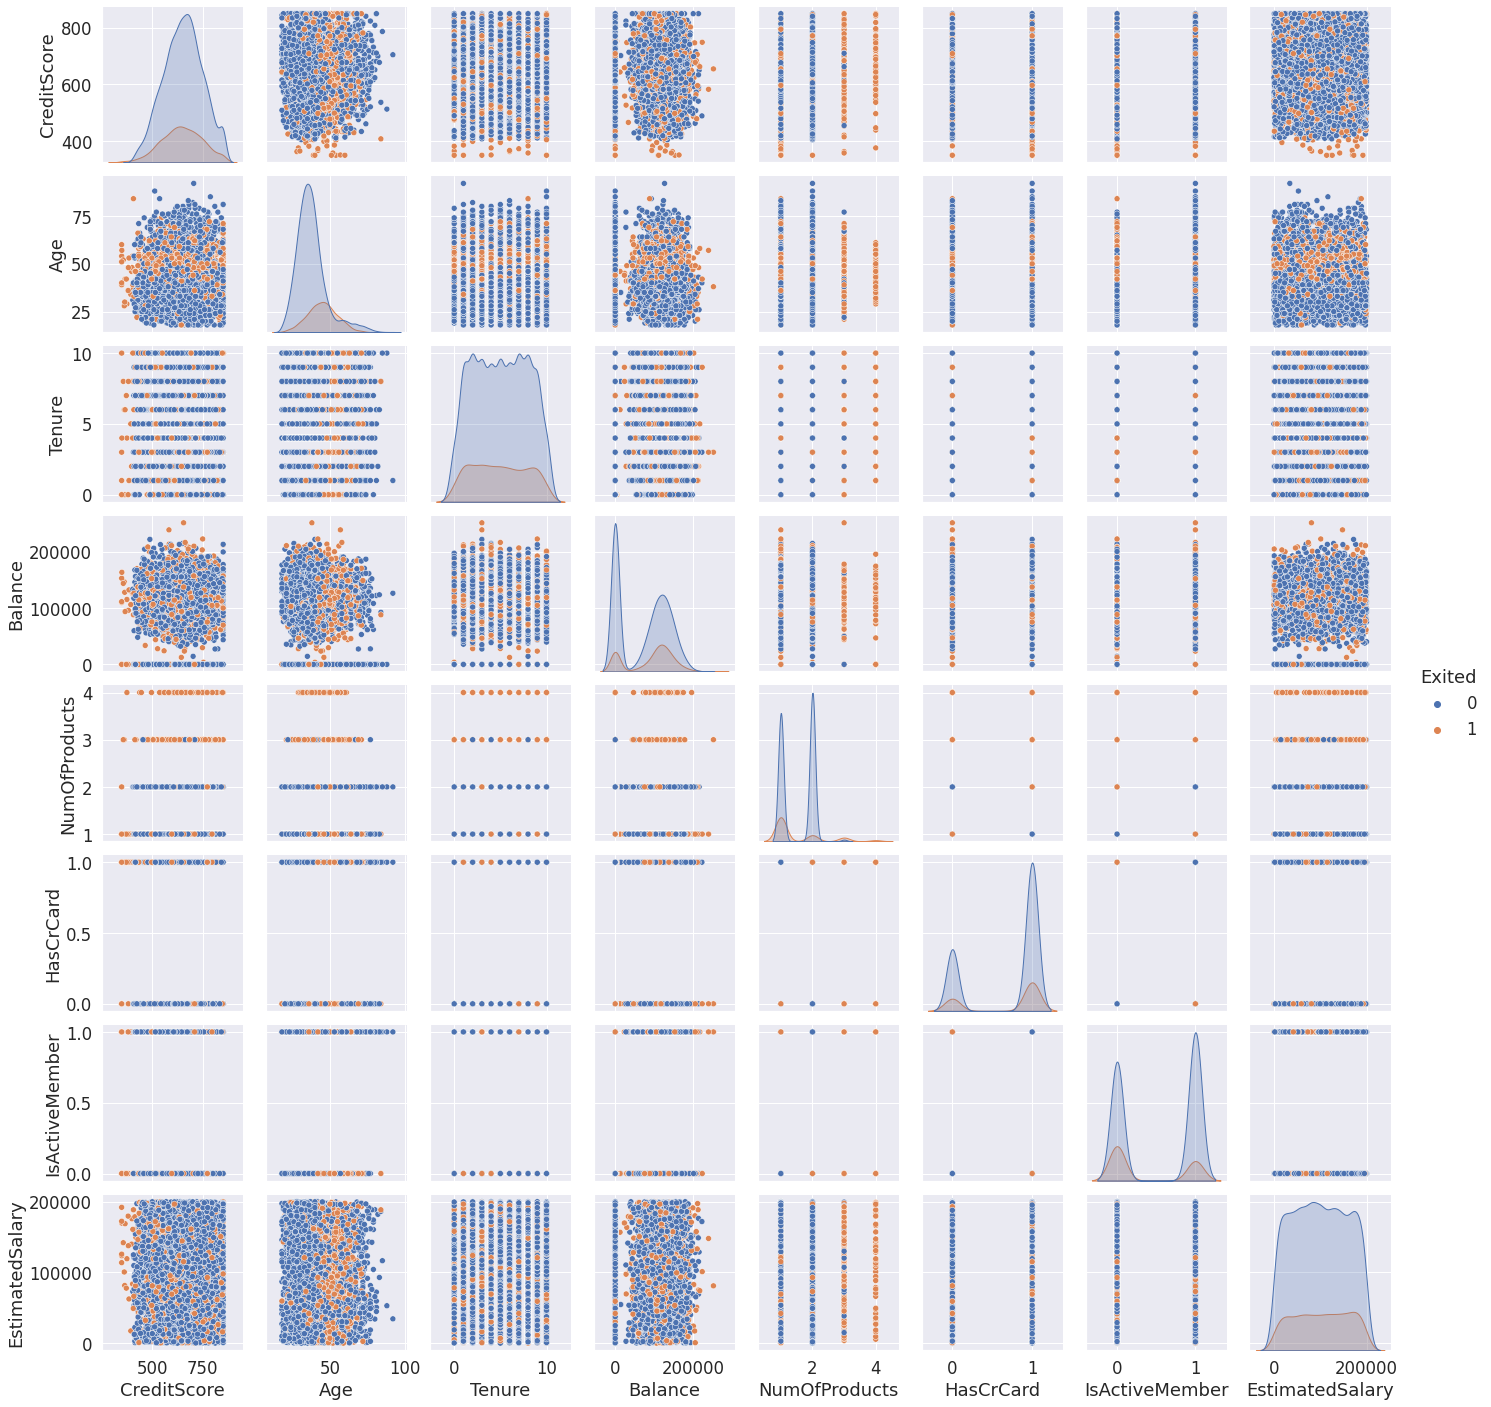

In [100]:
sns.pairplot(df, hue = "Exited")

In [101]:
# print(df.columns)
df = df.rename(columns={'CreditScore':'Credit_Score',
       'NumOfProducts':'Num_Of_Products', 'HasCrCard':'Has_Cr_Card',
       'IsActiveMember':'Is_Active_Member', 'EstimatedSalary':'Estimated_Salary'})
df.columns = df.columns.str.lower()
print(df.columns)

Index(['credit_score', 'geography', 'gender', 'age', 'tenure', 'balance',
       'num_of_products', 'has_cr_card', 'is_active_member',
       'estimated_salary', 'exited'],
      dtype='object')


Здесь я  удалила те столбцы, что не несут смысла для целей исследования, заменила тип данных в обном из столбцов.
    
Думаю, что выбросы незначительны (в столбце баланс, видно на гистограмме).
    
Явных дубликатов нет, мультиколлениарных данных нет.

Посмотрела как между собой распределены признаки с разбивкой на классы, думаю, их вплне можно разделить.

Ну и с целевым признаком признаки имеют очень слабую корреляцию, и достаточно слабо влияют на него, умеренное прямое влияние имеет влияние возраст.

## Исследование задачи

Выше я уже начала исследование данных и убрала ненужные для решения задачи столбцы.

<AxesSubplot:>

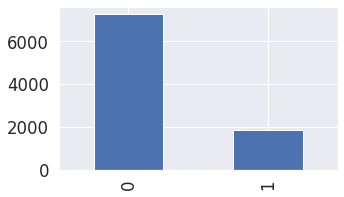

In [102]:
df['exited'].value_counts().plot(kind='bar', grid=True, figsize=(5,3)) # ушедших клиентов значительно больше, чем оставшихся

Как видно из матрицы коррелляции и матрицы, которую вывели с помощью функции pairplot, умеренно прямо влияет на то, останется клиент или нет возраст, чуть меньше -возраст, отрицательную корреляцию имеет активность и количество продуктов.

In [103]:
target_train, target_valid = train_test_split(df, test_size=0.4, random_state=12345) #разбиение датафрейма на обучающую и валидационную выборки

target_test, target_valid = train_test_split(target_valid, test_size=0.5, random_state=12345)

print(f"Размер обучающей выборки: {target_train.shape}, валидационной: {target_valid.shape} и тестовой: {target_test.shape}")

features_train = target_train.drop('exited', axis=1)
target_train = target_train['exited']
features_valid = target_valid.drop('exited', axis=1) 
target_valid = target_valid['exited'] 
features_test = target_test.drop('exited', axis=1) 
target_test = target_test['exited']

Размер обучающей выборки: (5454, 11), валидационной: (1819, 11) и тестовой: (1818, 11)


In [106]:
cat_col =['geography', 'gender']
num_col = ['credit_score', 'age', 'tenure', 'balance', 
           'num_of_products', 'has_cr_card', 'is_active_member',
       'estimated_salary']

На train выборке применяем fit_transform так как одновременно и обучаем и преобразуем тренировочные данные, а на остальных выборках используем результаты обучения

In [108]:
# Масштабирую
scaler = StandardScaler()
features_train_sc = pd.DataFrame(scaler.fit_transform(features_train[num_col]), columns=[num_col], index=features_train.index)
features_valid_sc = pd.DataFrame(scaler.transform(features_valid[num_col]), columns=[num_col], index=features_valid.index)
features_test_sc = pd.DataFrame(scaler.transform(features_test[num_col]), columns=[num_col], index=features_test.index)
# print(features_test_sc)

#Кодирование
encoder = OneHotEncoder(handle_unknown='error', drop ='first')
features_train_ohe = encoder.fit_transform(features_train[cat_col])
features_valid_ohe = encoder.transform(features_valid[cat_col])
features_test_ohe = encoder.transform(features_test[cat_col])

#Объединяю в одну выборку
features_train_lm = pd.concat([features_train_sc, pd.DataFrame(features_train_ohe.toarray(), index=features_train.index)], axis=1)
features_valid_lm = pd.concat([features_valid_sc, pd.DataFrame(features_valid_ohe.toarray(), index=features_valid.index)], axis=1)
features_test_lm = pd.concat([features_test_sc, pd.DataFrame(features_test_ohe.toarray(), index=features_test.index)], axis=1)

Модель логистической регрессии 

In [110]:
model_log = LogisticRegression(random_state=12345, solver='lbfgs')
model_log.fit(features_train_lm, target_train)
print("Accuracy обуч:", model_log.score(features_train_lm, target_train))
print("Accuracy валид:", model_log.score(features_valid_lm, target_valid))
prediction_valid = model_log.predict(features_valid_lm)
print('F1-мера', f1_score(prediction_valid, target_valid))

Accuracy обуч: 0.8049138247158049
Accuracy валид: 0.8257284222100055
F1-мера 0.32119914346895073


Точность логистической модели низкая.

Дерево решений

In [112]:
for depth in range(10,100,10):
    model_2 = DecisionTreeClassifier(random_state = 12345, max_depth=depth) 
    model_2.fit(features_train_lm, target_train) 
    accuracy = model_2.score(features_valid_lm, target_valid)
    prediction=model_2.predict(features_valid_lm)
    print(f"Глубина дерева {depth}, качество модели {accuracy}, F1-мера {f1_score(prediction,target_valid)}")


Глубина дерева 10, качество модели 0.8378229796591534, F1-мера 0.5203252032520326
Глубина дерева 20, качество модели 0.8037383177570093, F1-мера 0.49647390691114246
Глубина дерева 30, качество модели 0.799890049477735, F1-мера 0.4958448753462604
Глубина дерева 40, качество модели 0.799890049477735, F1-мера 0.4958448753462604
Глубина дерева 50, качество модели 0.799890049477735, F1-мера 0.4958448753462604
Глубина дерева 60, качество модели 0.799890049477735, F1-мера 0.4958448753462604
Глубина дерева 70, качество модели 0.799890049477735, F1-мера 0.4958448753462604
Глубина дерева 80, качество модели 0.799890049477735, F1-мера 0.4958448753462604
Глубина дерева 90, качество модели 0.799890049477735, F1-мера 0.4958448753462604


Точность модели Дерево решений при глубине дерева 10 достигает 0,52, что лучше, чем в модели логистической регрессии.

Случайный лес

In [114]:
for depth in range(10,100,10):
    model_3=RandomForestClassifier(max_depth=depth,n_estimators=50,random_state=1234)
    model_3.fit(features_train_lm, target_train)
    accuracy = model_3.score(features_valid_lm, target_valid)
    prediction=model_3.predict(features_valid_lm)
    print(f"Глубина дерева {depth}, качество модели {accuracy}, F1-мера {f1_score(prediction,target_valid)}")

Глубина дерева 10, качество модели 0.8691588785046729, F1-мера 0.5559701492537313
Глубина дерева 20, качество модели 0.8675096206706981, F1-мера 0.5734513274336284
Глубина дерева 30, качество модели 0.8719076415612974, F1-мера 0.5876106194690265
Глубина дерева 40, качество модели 0.8719076415612974, F1-мера 0.5876106194690265
Глубина дерева 50, качество модели 0.8719076415612974, F1-мера 0.5876106194690265
Глубина дерева 60, качество модели 0.8719076415612974, F1-мера 0.5876106194690265
Глубина дерева 70, качество модели 0.8719076415612974, F1-мера 0.5876106194690265
Глубина дерева 80, качество модели 0.8719076415612974, F1-мера 0.5876106194690265
Глубина дерева 90, качество модели 0.8719076415612974, F1-мера 0.5876106194690265


По результатам расчета метрик F1 score в каждой из моделей мы видим, что ни одна модель не подходит по полноте и точности, хотя лучшей оказалась модель Случайного леса: при глубине дерева от 30 f1-мера 0,587, что говорит о более точной модели.

## Борьба с дисбалансом

1. Работа с несбалансированными данными методом upsampling. 

In [115]:

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train_lm, target_train, 4)
features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)

In [116]:
#КОД РЕВЬЮЕРА

target_upsampled.value_counts()

1    4504
0    4328
Name: exited, dtype: int64

Во сколько раз один класс меньше второго, во столько и увеличиваем недостающий, здесь несбалансировано в сторону 1, примерно в 3 раза, в этой связи увеличиваю на 4

In [117]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid_lm)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.4970297029702971


Показатель F1- меры при балансировке модели увеличился.

2. Функция downsampling

In [118]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train_lm, target_train, 0.25)
features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)


In [119]:
#КОД РЕВЬЮЕРА

target_downsampled.value_counts()

1    1126
0    1082
Name: exited, dtype: int64

In [120]:
model_log = LogisticRegression(random_state=12345, solver='liblinear')
model_log.fit(features_downsampled, target_downsampled)
predicted_valid = model_log.predict(features_valid_lm)
print("F1 логистическая модель:", f1_score(target_valid, predicted_valid))

F1 логистическая модель: 0.4911591355599214


В целом, показатель F1-меры при использовании методов upsampling и downsampling вырос, что видно, например, на примере Логистической регрессии, но так как объемы данных по оставшимся клиентам у нас небольшие по размеру, в дальнейшем буду использовать данные, скорректированные с помощью метода upsampling, а не метода ,который уменьшает выборку.

In [121]:
%%time
f1_best = 0
best_depth = 0
for depth in range(1, 50, 10):
    model_2=DecisionTreeClassifier(max_depth=depth,random_state=1234)
    model_2.fit(features_upsampled, target_upsampled)
    prediction=model_2.predict(features_valid_lm)
    f1 = f1_score(prediction,target_valid)
    if f1 > f1_best:
        f1_best = f1
        best_depth = depth
print(f" Лучший показатель F1-меры {f1_best} Дерева решений достигается при глубине дерева {best_depth}")

 Лучший показатель F1-меры 0.49830124575311435 Дерева решений достигается при глубине дерева 11
CPU times: user 133 ms, sys: 0 ns, total: 133 ms
Wall time: 137 ms


## Тестирование модели

Для дальнейшей работы буду использовать модель случайного леса так как она показала лучшие показатели F1-меры на несбалансированных данных.

In [122]:
%%time
f1_best = 0
best_depth = 0
best_est = 0

for est in range(10, 1000, 100):
    for depth in range(1, 50, 10):
        model_3=RandomForestClassifier(max_depth=depth,n_estimators=est,random_state=1234)
        model_3.fit(features_upsampled, target_upsampled)
        prediction=model_3.predict(features_valid_lm)
        f1 = f1_score(prediction,target_valid)
        if f1 > f1_best:
            f1_best = f1
            best_depth = depth
            best_est = est
print(f" Лучший показатель F1-меры {f1_best} при глубине дерева {best_depth} и  числе деревьев {best_est}")

 Лучший показатель F1-меры 0.6191950464396285 при глубине дерева 31 и  числе деревьев 510
CPU times: user 2min 29s, sys: 679 ms, total: 2min 30s
Wall time: 2min 30s


 Лучший показатель F1-меры 0.619 при глубине дерева 31 и  числе деревьев 510

In [129]:
model_3=RandomForestClassifier(max_depth=31,n_estimators=510,random_state=1234)
model_3.fit(features_upsampled, target_upsampled)
prediction=model_3.predict(features_test_lm)
f1 = f1_score(prediction,target_test)
print('Показатель F1-меры  модели', f1)
print('Accuracy', accuracy_score(prediction,target_test))

Показатель F1-меры  модели 0.6172106824925816
Accuracy 0.858085808580858


In [130]:
print(confusion_matrix(prediction,target_test))

[[1352  169]
 [  89  208]]


Исследование метрики AUC-ROC


Cлучайный лес

In [132]:
probabilities_test3= model_3.predict_proba(features_test_lm)
probabilities_one_test3 = probabilities_test3[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_test3)

print(auc_roc)

0.8636501692569079


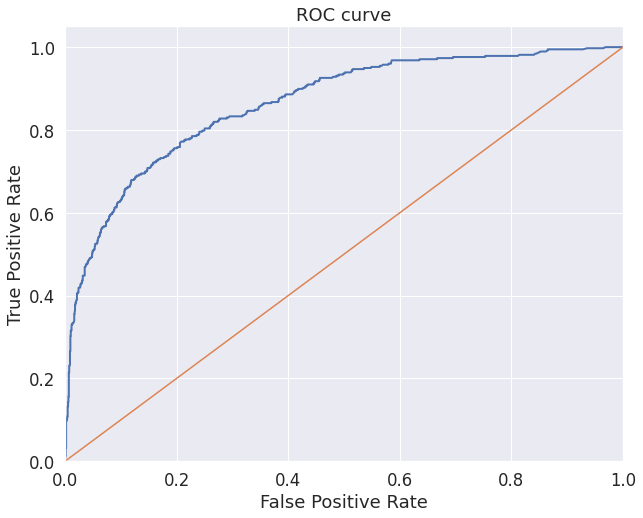

In [128]:
#Код отрисовки ROC-кривой c Хабра
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test3)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

Значение метрики AUC-ROC у модели Случайный лес составляет 0,86, что свидетельствует о хоршем качестве работы модели.

Вывод:

Лучший результат в ходе работы показала модель Случайный лес.